In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
from scipy.fftpack import fft2, fftshift, ifft2

In [21]:
def show(img:np, fft:np):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap="gray")
    plt.title("Image")
    plt.subplot(1,2,2)
    plt.imshow(np.abs(fft))
    plt.title("FFT of image")
    plt.tight_layout()
    plt.show()

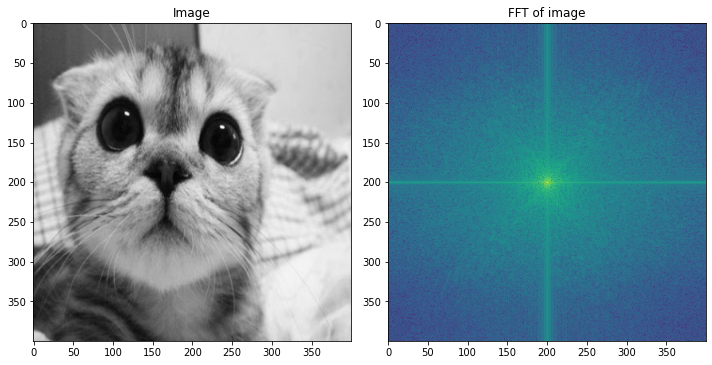

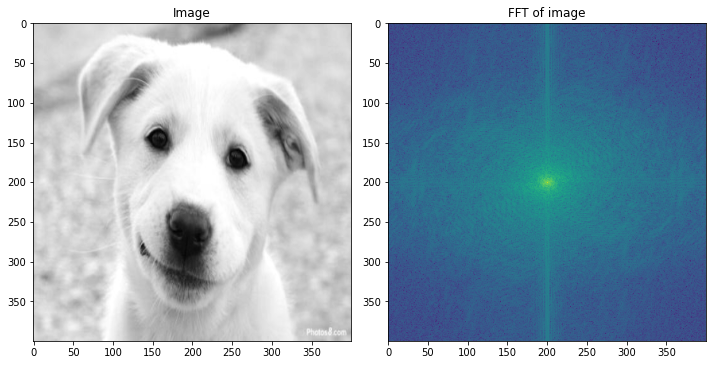

In [27]:
cat = cv2.imread("cat.jpg", cv2.IMREAD_GRAYSCALE)
dog = cv2.imread("dog.jpg", cv2.IMREAD_GRAYSCALE)
cat = cv2.resize(cat, (400,400))
dog = cv2.resize(dog, (400,400))

catFft = fft2(cat)
dogFft = fft2(dog)

show(cat, np.log(fftshift(catFft)))
show(dog, np.log(fftshift(dogFft)))

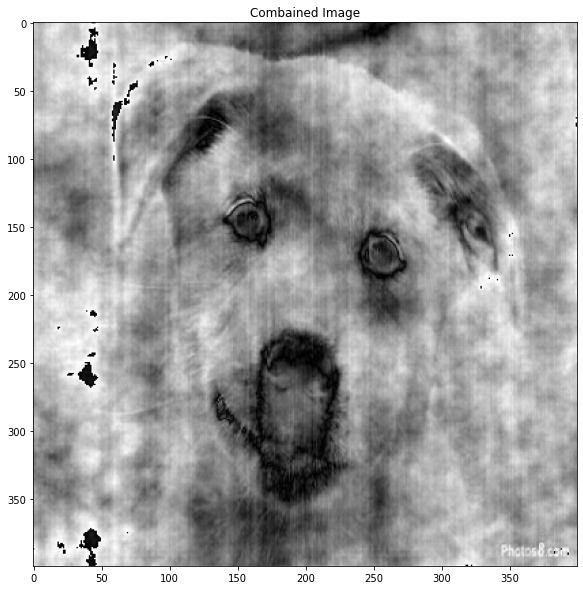

In [29]:
def amplitutde(mat:np)->np:
    return np.abs(mat)
def phase(mat:np)->np:
    return np.angle(mat)

catAmp = amplitutde(catFft)
dogPhase = phase(dogFft)

res = np.zeros((400,400), np.complex)

for i in range(catAmp.shape[0]):
    for j in range(catAmp.shape[1]):
        res[i,j] = catAmp[i,j]*np.cos(dogPhase[i,j]) + catAmp[i,j]*np.sin(dogPhase[i,j])*1j

combainedImage = ifft2(res)
combainedImage = np.abs(r)
combainedImage = combainedImage.astype(np.uint8)
plt.figure(figsize=(10,10))
plt.title("Combained Image")
plt.imshow(combainedImage, cmap="gray")
plt.show()
 